# Rapid Airfoil SK50VD Analysis with NeuralFoil

## Airfoil Definition

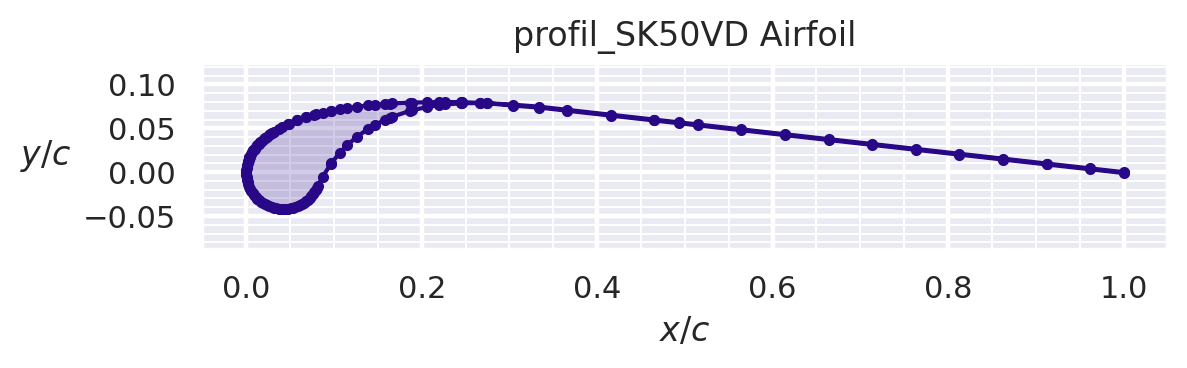

In [1]:
import aerosandbox as asb
import aerosandbox.numpy as np
import matplotlib.pyplot as plt
import aerosandbox.tools.pretty_plots as p

af = asb.Airfoil("profil_SK50VD")

fig, ax = plt.subplots(figsize=(6, 2))
af.draw()

## Airfoil Analysis

Basic usage:

In [2]:
af.get_aero_from_neuralfoil(
    alpha=5,
    Re=1e7,
    mach=0.0,
)

{'CL': array([0.91240262]),
 'CD': array([0.01068661]),
 'CM': array([-0.06480248]),
 'Cpmin': array([-1.73315557]),
 'Top_Xtr': array([0.10426389]),
 'Bot_Xtr': array([-0.02200956]),
 'mach_crit': array([0.48605986]),
 'mach_dd': array([0.5937816]),
 'Cpmin_0': array([-1.74100197])}

Advanced usage, with control surfaces and varying model sizes:

In [3]:
# af.get_aero_from_neuralfoil(
#     alpha=5,
#     Re=1e7,
#     mach=0.0,
#     model_size="xxxlarge",  # Can be "xsmall", "small", "medium", "large", "xlarge", "xxlarge", or "xxxlarge"
#     control_surfaces=[
#         asb.ControlSurface(
#             name="kite",
#             deflection=10,  # Positive is trailing-edge down
#             hinge_point=0.75,
#         )
#     ],
# )

Vectorized usage:

In [3]:
af.get_aero_from_neuralfoil(
    alpha=np.array([0, 5, 10, 15]),
    Re=1e7,
    mach=0.0,
)

{'CL': array([0.34364157, 0.91240262, 1.42778101, 1.70402106]),
 'CD': array([0.0307497 , 0.01068661, 0.01260359, 0.02355935]),
 'CM': array([-0.03665027, -0.06480248, -0.0493194 , -0.03887162]),
 'Cpmin': array([-0.74884937, -1.73315557, -4.87227416, -8.37482923]),
 'Top_Xtr': array([ 0.1767022 ,  0.10426389, -0.00626867, -0.00994841]),
 'Bot_Xtr': array([ 0.03735891, -0.02200956, -0.04352134,  0.04484537]),
 'mach_crit': array([0.63112704, 0.48605986, 0.32232053, 0.25256116]),
 'mach_dd': array([0.73884878, 0.5937816 , 0.43004227, 0.36028289]),
 'Cpmin_0': array([-0.75223959, -1.74100197, -4.89433209, -8.41274405])}

Note that vectorization must be with 1D arrays. You can flatten higher-dimensional arrays to achieve this.

For example, this shows vectorized analysis across a 2D grid in angle of attack and Reynolds number:

In [4]:
af = asb.Airfoil("profil_SK50VD")

alpha = np.linspace(0, 20, 35)
re = np.geomspace(9e5, 3e7, 10)

Alpha, Re = np.meshgrid(alpha, re)

aero_flattened = af.get_aero_from_neuralfoil(
    alpha=Alpha.flatten(),
    Re=Re.flatten(),
    mach=0,
    model_size="xxxlarge",
)
Aero = {
    key: value.reshape(Alpha.shape)
    for key, value in aero_flattened.items()
}

We can plot the results:

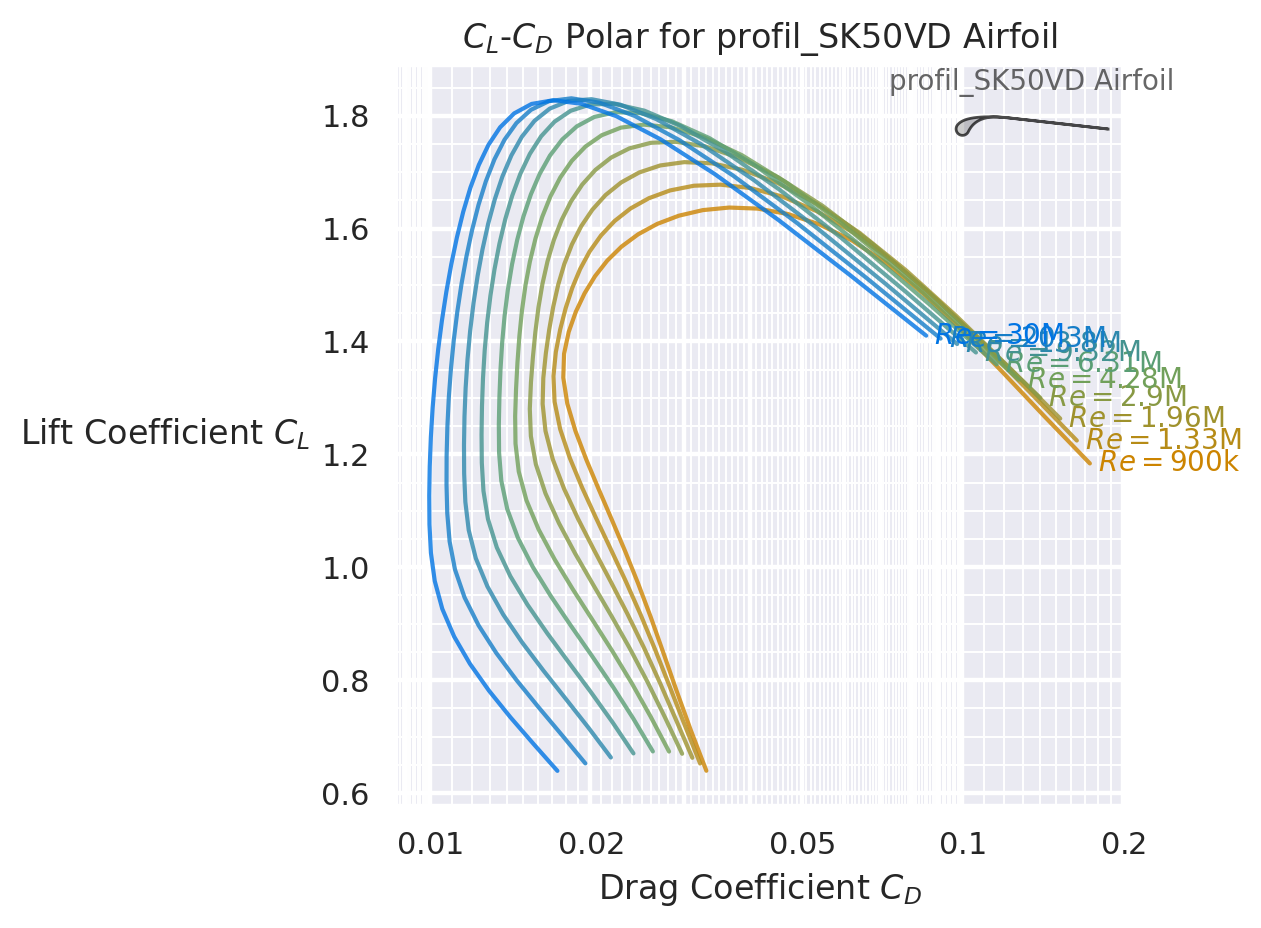

In [5]:
from matplotlib.colors import LinearSegmentedColormap
from aerosandbox.tools.string_formatting import eng_string

fig, ax = plt.subplots()
colors = LinearSegmentedColormap.from_list(
    "custom_cmap",
    colors=[
        p.adjust_lightness(c, 0.8) for c in
        ["orange", "darkseagreen", "dodgerblue"]
    ]
)(np.linspace(0, 1, len(re)))

for i in range(len(re)):
    line, = ax.plot(
        Aero["CD"][i, :],
        Aero["CL"][i, :],
        color=colors[i], alpha=0.8,
    )

    plt.annotate(
        f" $Re = \\mathrm{{{eng_string(re[i])}}}$",
        xy=(line.get_xdata()[-1], line.get_ydata()[-1]),
        color=colors[i],
        ha="left", va="center", fontsize=10
    )

afax = ax.inset_axes([0.76, 0.802, 0.23, 0.23])
afax.fill(
    af.x(), af.y(),
    facecolor=(0, 0, 0, 0.2), linewidth=1, edgecolor=(0, 0, 0, 0.7)
)
afax.annotate(
    text=f"{af.name} Airfoil\n",
    xy=(0.5, 0),
    ha="center", va="bottom", fontsize=10,
    alpha=0.7
)
afax.axis('off')
afax.axis('equal')

plt.xscale('log')
p.show_plot(
    title=f"$C_L$-$C_D$ Polar for {af.name} Airfoil",
    xlabel="Drag Coefficient $C_D$",
    ylabel="Lift Coefficient $C_L$",
)

Maintenant tracer le spolaires Cl=f(alpha), ...


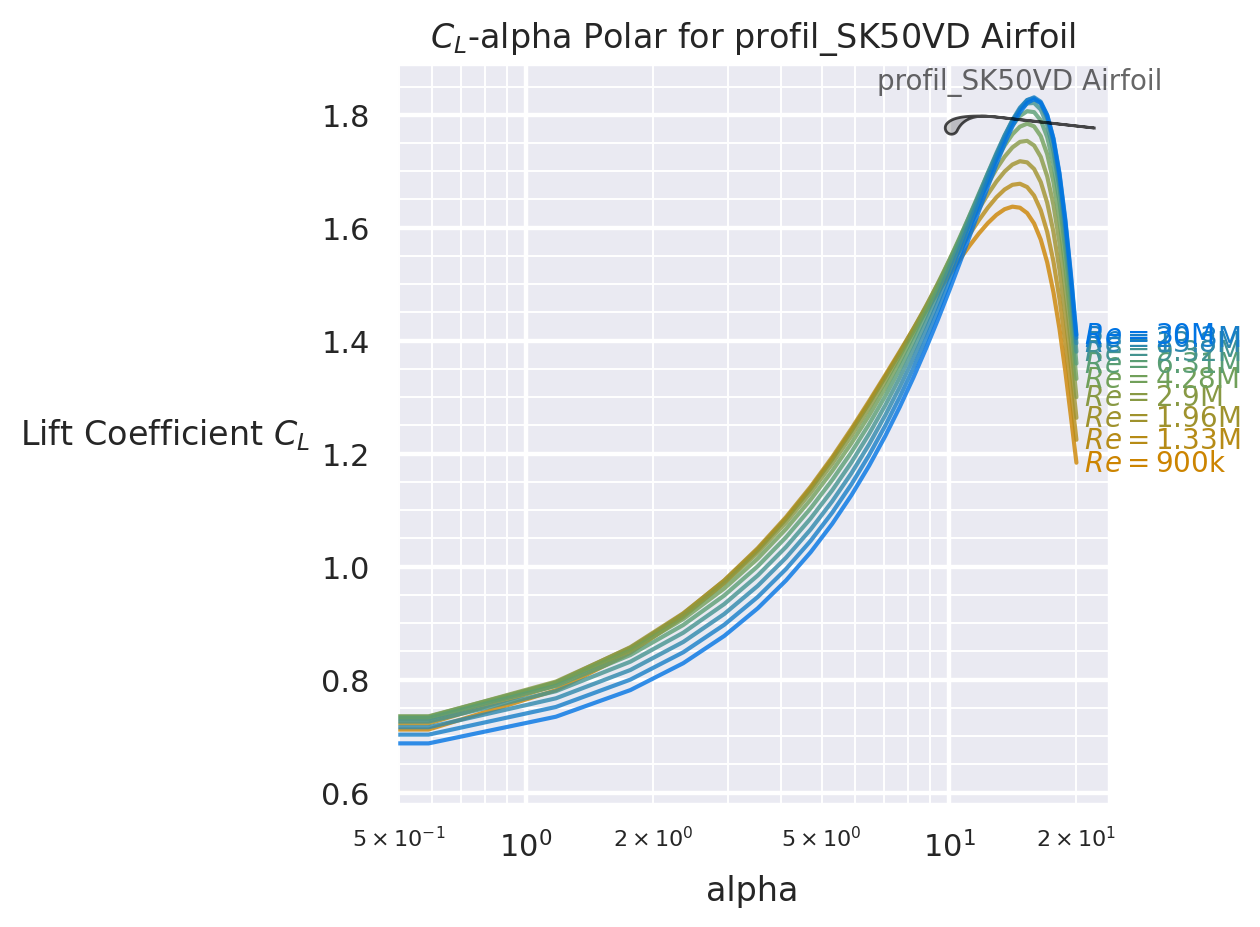

In [11]:
fig, ax = plt.subplots()
colors = LinearSegmentedColormap.from_list(
    "custom_cmap",
    colors=[
        p.adjust_lightness(c, 0.8) for c in
        ["orange", "darkseagreen", "dodgerblue"]
    ]
)(np.linspace(0, 1, len(re)))

for i in range(len(re)):
    line, = ax.plot(
        Alpha[i, :],
        Aero["CL"][i, :],
        color=colors[i], alpha=0.8,
    )

    plt.annotate(
        f" $Re = \\mathrm{{{eng_string(re[i])}}}$",
        xy=(line.get_xdata()[-1], line.get_ydata()[-1]),
        color=colors[i],
        ha="left", va="center", fontsize=10
    )

afax = ax.inset_axes([0.76, 0.802, 0.23, 0.23])
afax.fill(
    af.x(), af.y(),
    facecolor=(0, 0, 0, 0.2), linewidth=1, edgecolor=(0, 0, 0, 0.7)
)
afax.annotate(
    text=f"{af.name} Airfoil\n",
    xy=(0.5, 0),
    ha="center", va="bottom", fontsize=10,
    alpha=0.7
)
afax.axis('off')
afax.axis('equal')

plt.xscale('log')
p.show_plot(
    title=f"$C_L$-alpha Polar for {af.name} Airfoil",
    xlabel="alpha",
    ylabel="Lift Coefficient $C_L$",
)

In [12]:
print(re)

[  900000.          1328774.41974583  1961823.84285652  2896468.15381689
  4276391.98933368  6313733.64914731  9321697.51786159 13762703.5670474
 20319476.05159696 30000000.        ]


## Post-Stall Airfoil Analysis

Neuralfoil returns reasonably-accurate results for a 360 degree angle of attack range:

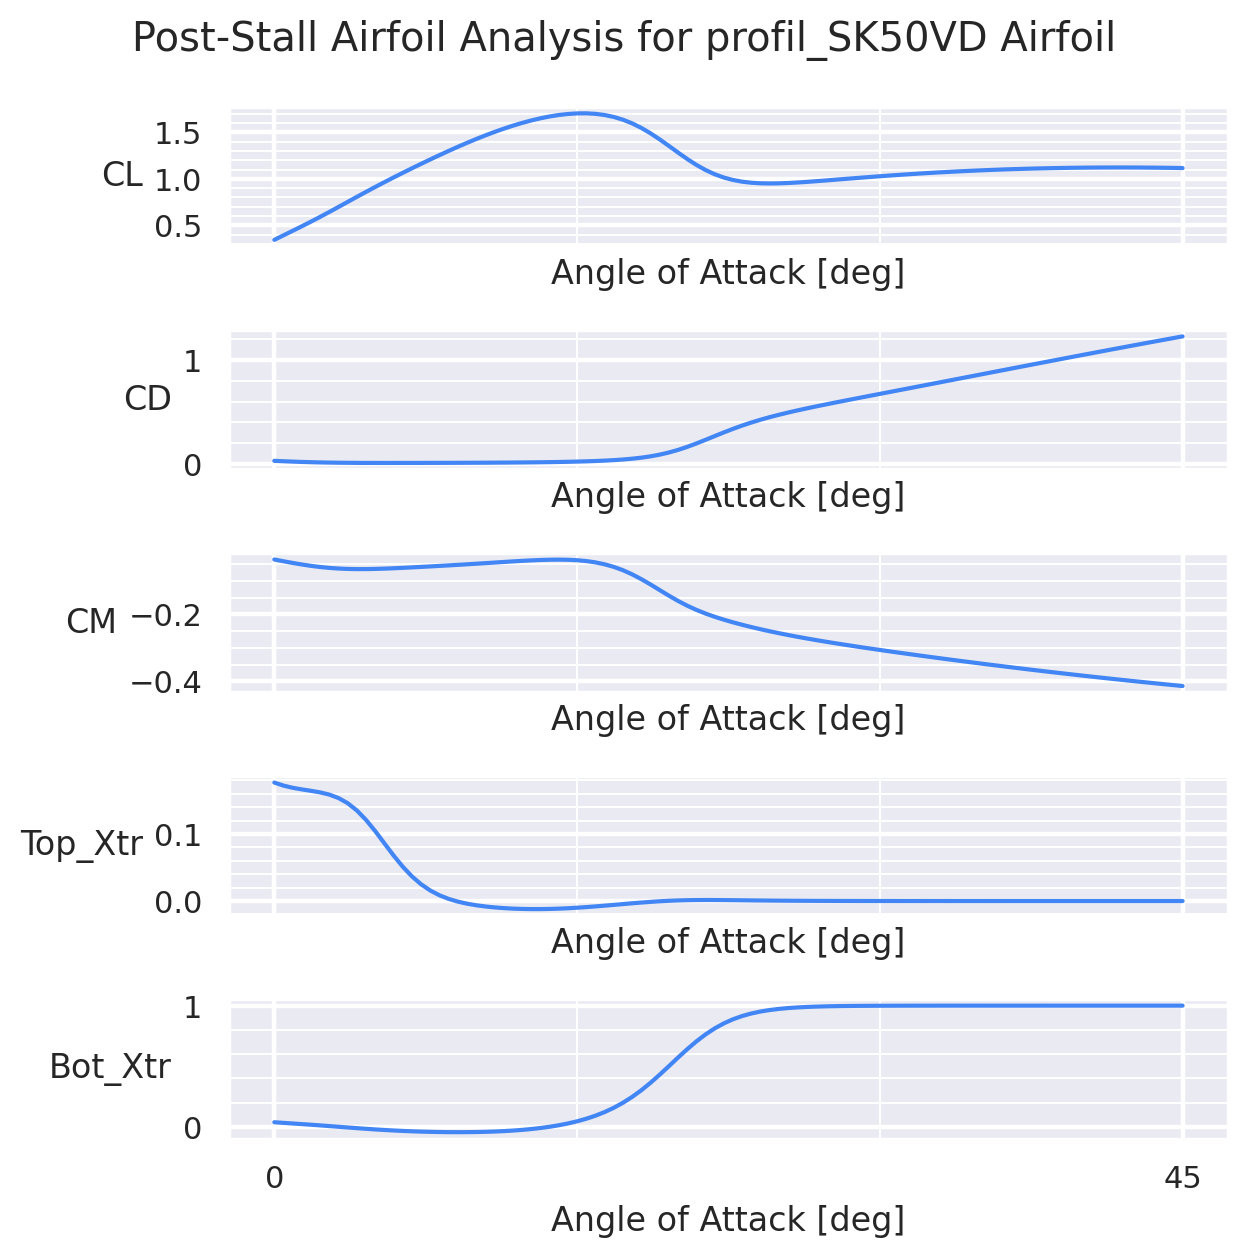

In [8]:
af = asb.Airfoil("profil_SK50VD")

alpha = np.linspace(0, 45, 100)
aero = af.get_aero_from_neuralfoil(
    alpha=alpha,
    Re=1e7,
    mach=0,
)

keys_to_plot = ["CL", "CD", "CM", "Top_Xtr", "Bot_Xtr"]

fig, ax = plt.subplots(len(keys_to_plot), 1, figsize=(6.4, 6.4), sharex=True)
for i, key in enumerate(keys_to_plot):
    plt.sca(ax[i])
    plt.plot(
        alpha,
        aero[key],
    )
    plt.ylabel(key)
    p.set_ticks(45, 15)
    from matplotlib.ticker import AutoMinorLocator

    ax[i].yaxis.set_minor_locator(AutoMinorLocator())

p.show_plot(
    title=f"Post-Stall Airfoil Analysis for {af.name} Airfoil",
    xlabel="Angle of Attack [deg]",
    set_ticks=False
)